In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
#Load Dataset


df = pd.read_csv("/content/job_market_india.csv")

print("Dataset Loaded Successfully!")
print("\nFirst 5 Rows of Dataset:")
print(df)


Dataset Loaded Successfully!

First 5 Rows of Dataset:
                                             Job Title  \
0                              Robotics / STEM Trainer   
1                           HTML Developers - Freshers   
2                           Java Developers - Freshers   
3    Teachers - Pre-Primary and Primary (English, M...   
4                                      College Student   
..                                                 ...   
830       Back Office Executive (Operations Insurance)   
831  Business Development Executive (Freshers & Exp...   
832                          Sales & Marketing Manager   
833                          Sales & Marketing Officer   
834                         Field Sales Representative   

                            Location                        Salary  \
0             Indore, Madhya Pradesh  ₹1,80,000 - ₹3,60,000 a year   
1    Banaswadi, Bengaluru, Karnataka                 Not specified   
2    Banaswadi, Bengaluru, Karnataka  

In [4]:
#Basic Information


print("\nDataset Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nChecking Missing Values:")
print(df.isnull().sum())


Dataset Shape:
(835, 6)

Data Types:
Job_Title          object
Location           object
Salary             object
Monthly_Salary    float64
Locality           object
State              object
dtype: object

Checking Missing Values:
Job_Title           0
Location            0
Salary              0
Monthly_Salary    338
Locality          581
State               0
dtype: int64


In [5]:
#Remove Duplicate Rows


duplicates = df.duplicated().sum()
print("\nTotal Duplicate Rows:", duplicates)

df = df.drop_duplicates()
print("Duplicates Removed!")

print("New Shape:", df.shape)


Total Duplicate Rows: 5
Duplicates Removed!
New Shape: (830, 6)


In [6]:
#Handle Missing Values Safely


print("\nHandling Missing Values...")

# Numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
    print(f"Filled numeric column '{col}' with median.")

# Categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"Filled categorical column '{col}' with mode.")

print("Missing Value Treatment Completed!")


Handling Missing Values...
Filled numeric column 'Monthly_Salary' with median.
Filled categorical column 'Job_Title' with mode.
Filled categorical column 'Location' with mode.
Filled categorical column 'Salary' with mode.
Filled categorical column 'Locality' with mode.
Filled categorical column 'State' with mode.
Missing Value Treatment Completed!



Monthly Salary Summary:
count       830.000000
mean      45497.029807
std      100502.457092
min         180.000000
25%       17500.000000
50%       19250.000000
75%       21000.000000
max      939847.175000
Name: Monthly_Salary, dtype: float64


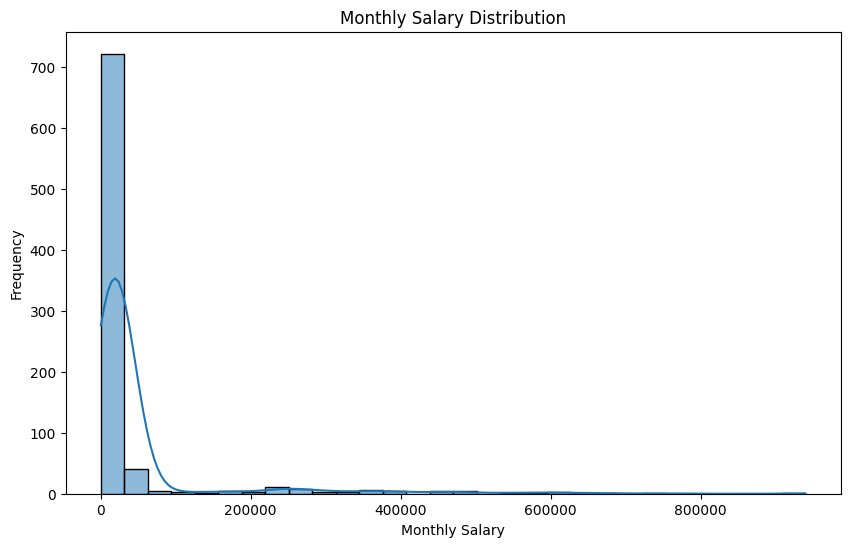

Monthly Salary Distribution Chart Displayed.


In [8]:
#EXPLORATORY DATA ANALYSIS

#Salary Distribution

# Check if 'Monthly_Salary' column exists and is numeric
if 'Monthly_Salary' in df.columns and pd.api.types.is_numeric_dtype(df['Monthly_Salary']):
    print("\nMonthly Salary Summary:")
    print(df['Monthly_Salary'].describe())

    # Plotting histogram for Monthly_Salary
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Monthly_Salary'], bins=30, kde=True)
    plt.title("Monthly Salary Distribution")
    plt.xlabel("Monthly Salary")
    plt.ylabel("Frequency")
    plt.show()

    print("Monthly Salary Distribution Chart Displayed.")
else:
    print("\n'Monthly_Salary' column not found or is not numeric, cannot plot distribution.")



Top 10 Job Titles:
Job_Title
Delivery Partner/Delivery Executive    9
Trainee                                8
Video Editor                           8
Business Development Associate         8
Management Trainee                     6
Software Trainee                       5
Data Entry Operator                    5
Assistant Supervisor                   4
Graduate Trainee                       4
Delivery Executive/Delivery Partner    4
Name: count, dtype: int64


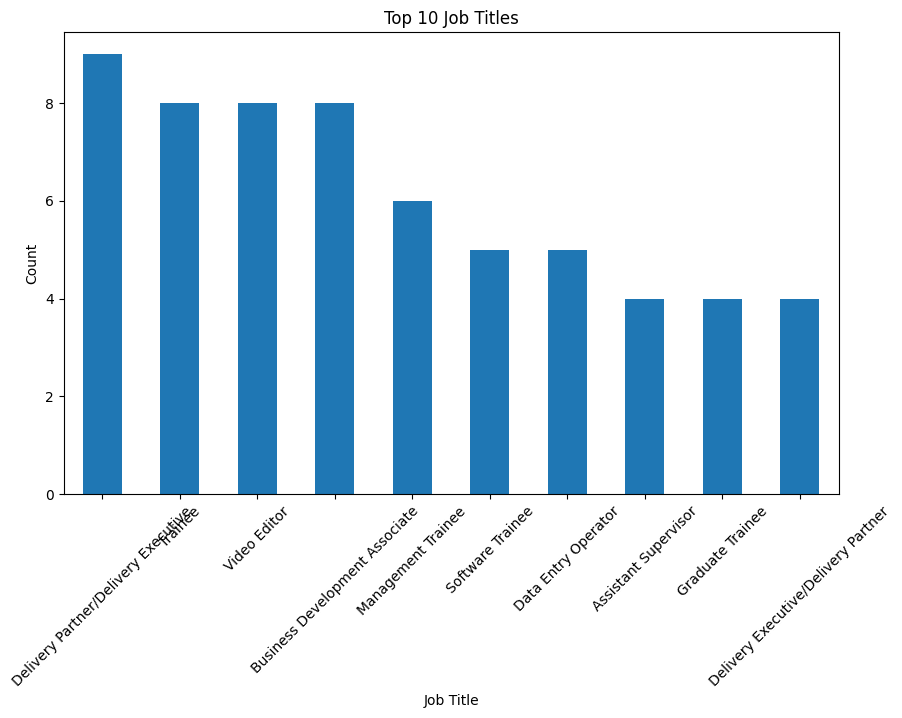

Job Title Chart Displayed.


In [12]:
#Job Title Distribution


if 'Job_Title' in df.columns:
    print("\nTop 10 Job Titles:")
    print(df['Job_Title'].value_counts().head(10))

    plt.figure(figsize=(10, 6))
    df['Job_Title'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Job Titles")
    plt.xlabel("Job Title")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    print("Job Title Chart Displayed.")
else:
    print("\n'Job_Title' column not found.")


Top 10 Locations:
Location
Remote                        89
Bengaluru, Karnataka          61
Kochi, Kerala                 52
Chennai, Tamil Nadu           21
Coimbatore, Tamil Nadu        20
Pune, Maharashtra             17
Noida, Uttar Pradesh          16
Delhi, Delhi                  15
Mumbai, Maharashtra           15
Thiruvananthapuram, Kerala    13
Name: count, dtype: int64


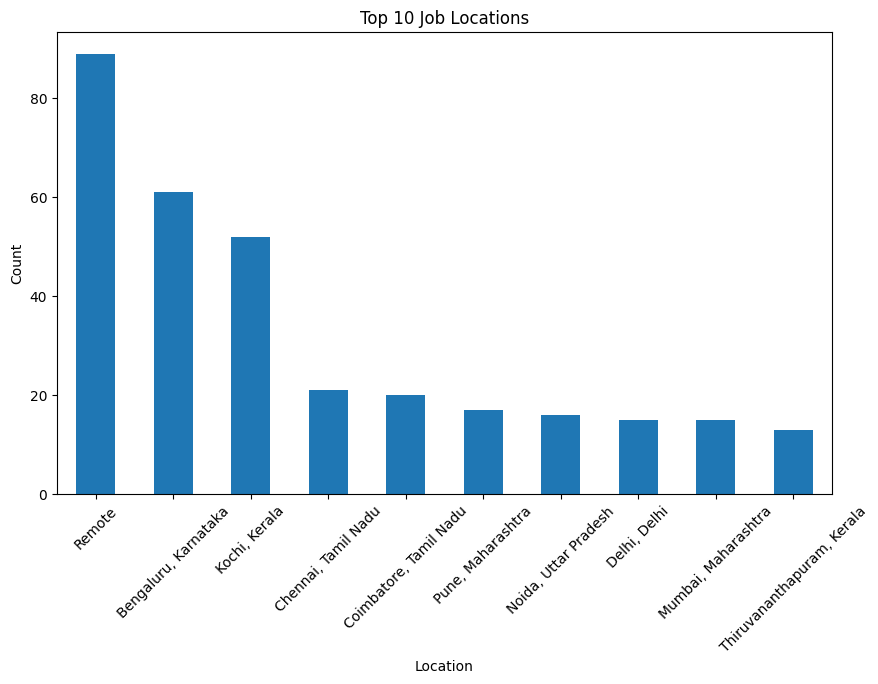

Location Chart Displayed.


In [13]:
#Location Analysis (If Exists)


if 'Location' in df.columns:
    print("\nTop 10 Locations:")
    print(df['Location'].value_counts().head(10))

    df['Location'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Job Locations")
    plt.xlabel("Location")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    print("Location Chart Displayed.")
else:
    print("\n'Location' column not found.")

In [21]:
#Education Level Distribution (If Exists)


if 'Education' in df.columns:
    print("\nEducation Level Distribution:")
    print(df['Education'].value_counts())

    df['Education'].value_counts().plot(kind='bar')
    plt.title("Education Level Distribution")
    plt.xlabel("Education")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    print("Education Chart Displayed.")
else:
    print("\n'Education' column not found.")


'Education' column not found.


In [15]:
print("Available columns in the DataFrame:")
print(df.columns.tolist())

Available columns in the DataFrame:
['Job_Title', 'Location', 'Salary', 'Monthly_Salary', 'Locality', 'State']


In [20]:
#Save Cleaned Dataset

from google.colab import files

df.to_csv("Cleaned job_market_india.csv", index=False)
print("\nCleaned Dataset Saved Successfully!")

files.download("Cleaned job_market_india.csv")



Cleaned Dataset Saved Successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>